In [134]:
#import all packages
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math
from dataclasses import dataclass
import random

In [135]:
#load data
#in this example: 3 imaginary clusters

#create random centroids
#TODO: make varriable
@dataclass        
class centroid:
    x: float
    y: float
    counter: int = 0
    score_x: float = 0
    score_y: float = 0

cluster_guess=3        
a = centroid(random.uniform(0,10), random.uniform(0, 10))
b = centroid(random.uniform(0,10), random.uniform(0, 10))
c = centroid(random.uniform(0,10), random.uniform(0, 10))



#create 3 clusters of randomly distributed points

#create emty arrays of right size
cluster_x = np.zeros((300,1))
cluster_1_x =  np.zeros((100, 1))
cluster_2_x =  np.zeros((100, 1))
cluster_3_x =  np.zeros((100, 1))

cluster_y = np.zeros((300,1))
cluster_1_y =  np.zeros((100, 1))
cluster_2_y =  np.zeros((100, 1))
cluster_3_y =  np.zeros((100, 1))

#fill array with randomly chosen x-/ y-values
#points are choosen around perfekt centroid:
# 1: 2, 2
# 2: 8, 2
# 3: 2, 8
for x in range(100):
    cluster_1_x[x] = random.uniform(1, 3)
    
for x in range(100):
    cluster_2_x[x] = random.uniform(7, 9)
    
for x in range(100):
    cluster_3_x[x] = random.uniform(1, 3)
    
for x in range(100):
    cluster_1_y[x] = random.uniform(1, 3)
    
for x in range(100):
    cluster_2_y[x] = random.uniform(1, 3)
    
for x in range(100):
    cluster_3_y[x] = random.uniform(7, 9)

    
#concentrate cluster_1/ 2/ 3 into one array for x and y each
cluster_x = np.concatenate((cluster_1_x, cluster_2_x), axis=0)
cluster_x = np.concatenate((cluster_x, cluster_3_x), axis=0)

cluster_y = np.concatenate((cluster_1_y, cluster_2_y), axis=0)
cluster_y = np.concatenate((cluster_y, cluster_3_y), axis=0)


#create 2D array
# 6 dimension because: x-value, y-value, the closest centroid, distance to centroids, ....
array = np.zeros((300,6))

#counter to go through x and y array
x_counter=0
y_counter=0

#load 2D array with dara
for counter_load, row in enumerate(array):
    row[0]=cluster_x[x_counter]
    row[1]=cluster_y[y_counter]
    x_counter+=1
    y_counter+=1
    
print("  X          Y         clos_centr  dis_a      dis_b      dis_c")
print(array)
print("\n")
print("Centroids:")
print(a)
print(b)
print(c)

  X          Y         clos_centr  dis_a      dis_b      dis_c
[[2.45455919 1.18723146 0.         0.         0.         0.        ]
 [2.60277015 1.65419725 0.         0.         0.         0.        ]
 [1.13717773 1.07284481 0.         0.         0.         0.        ]
 ...
 [1.8811501  7.9516426  0.         0.         0.         0.        ]
 [1.13002681 8.73946896 0.         0.         0.         0.        ]
 [1.28097668 8.94612775 0.         0.         0.         0.        ]]


Centroids:
centroid(x=1.5743829898711603, y=2.730758252348222, counter=0, score_x=0, score_y=0)
centroid(x=5.672262609518111, y=5.534810739460774, counter=0, score_x=0, score_y=0)
centroid(x=8.905934306454752, y=0.46799403026152264, counter=0, score_x=0, score_y=0)


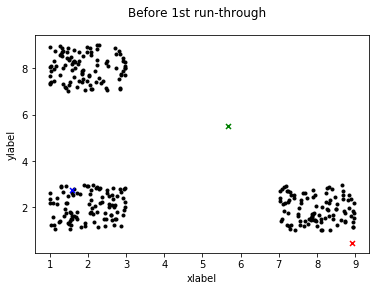

In [136]:
#function which prints all points in their colour corresbonding to their closest centroid
#in first run through every point is printed in black
def plot_array():
    
    #label plot
    plt.xlabel('xlabel')
    plt.ylabel('ylabel')

    #draw points
    for counter, value in enumerate(array):
        if value[2] == 0:
            plt.plot(value[0],value[1], 'ko', markersize=3)
            
        elif value[2] == 1:
            plt.plot(value[0],value[1], 'bo', markersize=3)
            
        elif value[2] == 2:
            plt.plot(value[0],value[1], 'go', markersize=3)
            
        if value[2] == 3:
            plt.plot(value[0],value[1], 'ro', markersize=3)
            
    plt.plot(a.x, a.y, 'bx', markersize=5, markerfacecolor = 'k', markeredgewidth=1.5)
    plt.plot(b.x, b.y, 'gx', markersize=5, markerfacecolor = 'k', markeredgewidth=1.5)
    plt.plot(c.x, c.y, 'rx', markersize=5, markerfacecolor = 'k', markeredgewidth=1.5)
       
    

#create image
fig = plt.figure()
fig.suptitle('Before 1st run-through')
plot_array()
plt.show()  

In [137]:
#measures distance between a x-/ y-value and centroid and returns distance
def distance_to_point(x, y, centroid):
    del_x = x-centroid.x 
    del_y = y-centroid.y
    del_x = -del_x if del_x<0 else del_x
    del_y = -del_y if del_y<0 else del_y
    distance = math.sqrt(del_x*del_x + del_y*del_y)
    return distance

#measures distance between a x-/ y-value and centroid and returns distance
def measure_distance():
    
    for counter_array, value in enumerate(array):
        distance_a = distance_to_point(value[0], value[1], a)
        array[counter_array, 3] = distance_a
        
    for counter_array, value in enumerate(array):
        distance_b = distance_to_point(value[0], value[1], b)
        array[counter_array, 4] = distance_b
        
    for counter_array, value in enumerate(array):
        distance_c = distance_to_point(value[0], value[1], c)
        array[counter_array, 5] = distance_c

        
measure_distance()   
print("  X          Y         clos_centr  dis_a      dis_b      dis_c")
print(array)

  X          Y         clos_centr  dis_a      dis_b      dis_c
[[ 2.45455919  1.18723146  0.          1.77684695  5.40879477  6.49134372]
 [ 2.60277015  1.65419725  0.          1.48881286  4.94782225  6.41380983]
 [ 1.13717773  1.07284481  0.          1.71459192  6.36208573  7.79226689]
 ...
 [ 1.8811501   7.9516426   0.          5.22988905  4.49595488 10.26414093]
 [ 1.13002681  8.73946896  0.          6.02511881  5.55893338 11.35262238]
 [ 1.28097668  8.94612775  0.          6.222291    5.5606183  11.4025756 ]]


  X          Y         clos_centr  dis_a      dis_b      dis_c
[[ 2.45455919  1.18723146  1.          1.77684695  5.40879477  6.49134372]
 [ 2.60277015  1.65419725  1.          1.48881286  4.94782225  6.41380983]
 [ 1.13717773  1.07284481  1.          1.71459192  6.36208573  7.79226689]
 ...
 [ 1.8811501   7.9516426   2.          5.22988905  4.49595488 10.26414093]
 [ 1.13002681  8.73946896  2.          6.02511881  5.55893338 11.35262238]
 [ 1.28097668  8.94612775  2.          6.222291    5.5606183  11.4025756 ]]


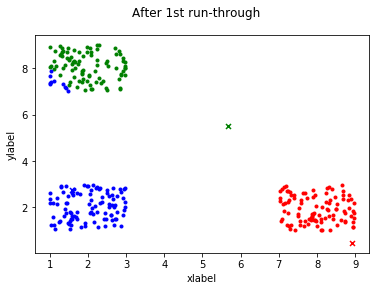

In [138]:
#measure closest centroid and assigns to array
#closest centroid a=1, b=2, c=3
def closest_centroid():
    for counter_array, value in enumerate(array):
        distance_a = value[3]
        distance_b = value[4]
        distance_c = value[5]
    
        if distance_a < distance_b and distance_a < distance_c:
            value[2] = 1
            
        elif distance_b < distance_a and distance_b < distance_c:
            value[2] = 2
            
        elif distance_c < distance_b and distance_c < distance_a:
            value[2] = 3
        
        else:
            print("Error: two identical distances at ponit:  " + str(counter_array +1))
        
closest_centroid()     
print("  X          Y         clos_centr  dis_a      dis_b      dis_c")
print(array)

fig = plt.figure()
fig.suptitle('After 1st run-through')
#array is now able to print points in their colour
plot_array()
plt.show()

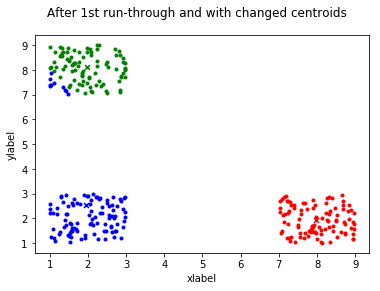

centroid(x=1.9451611773936706, y=2.531391811397009, counter=0, score_x=0, score_y=0)
centroid(x=1.9851895379805573, y=8.104140629648999, counter=0, score_x=0, score_y=0)
centroid(x=7.981791359753243, y=1.9256940917768086, counter=0, score_x=0, score_y=0)


In [139]:
#für die centroiden werden die x und y koordinaten der zugehörigen punkte addiert und durch die Anzahl der zugeordneten Punkte geteilt
def reassign_centroid():
    
    #goes through the array and adds for each centroid the x-/ y-values and a counter to keep track of the number of inputs
    for counter_array, value in enumerate(array):
       
        if value[2] == 1:
            a.counter += 1
            a.score_x += value[0]
            a.score_y += value[1]
            
        elif value[2] == 2:
            b.counter += 1
            b.score_x += value[0]
            b.score_y += value[1]
            
        elif value[2] == 3:
            c.counter += 1
            c.score_x += value[0]
            c.score_y += value[1]
        
    #if there are points assigned to each centroid
    #the centroids are reassigned
    if a.score_x != 0 and a.counter !=0:
        a.x = a.score_x / a.counter
        a.y = a.score_y / a.counter
    if b.score_x != 0 and b.counter !=0:
        b.x = b.score_x / b.counter
        b.y = b.score_y / b.counter
    if c.score_x != 0 and c.counter !=0:
        c.x = c.score_x / c.counter
        c.y = c.score_y / c.counter
    
   
    #resets values for the next reassign_centroid() / kmean runthrough
    a.counter = 0
    a.score_x = 0
    a.score_y = 0
    b.counter = 0
    b.score_x = 0
    b.score_y = 0
    c.counter = 0
    c.score_x = 0
    c.score_y = 0


reassign_centroid()
fig = plt.figure()
fig.suptitle('After 1st run-through and with changed centroids')
plot_array()
plt.show()
print(a)
print(b)
print(c)

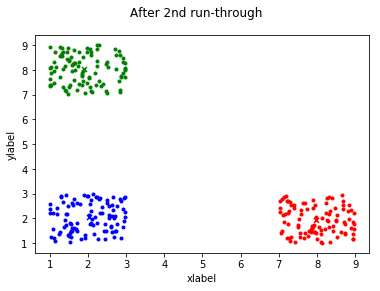

centroid(x=2.0209016472277055, y=2.0466964897453943, counter=0, score_x=0, score_y=0)
centroid(x=1.9054462320878331, y=8.031561069475417, counter=0, score_x=0, score_y=0)
centroid(x=7.981791359753243, y=1.9256940917768086, counter=0, score_x=0, score_y=0)


In [140]:
#zweiter durchlauf von k mean
measure_distance()
closest_centroid()
reassign_centroid()


fig = plt.figure()
fig.suptitle('After 2nd run-through')
plot_array()
plt.show()
print(a)
print(b)
print(c)

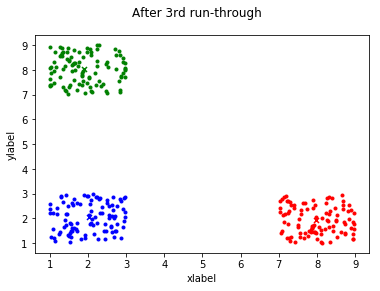

centroid(x=2.0209016472277055, y=2.0466964897453943, counter=0, score_x=0, score_y=0)
centroid(x=1.9054462320878331, y=8.031561069475417, counter=0, score_x=0, score_y=0)
centroid(x=7.981791359753243, y=1.9256940917768086, counter=0, score_x=0, score_y=0)


In [141]:
#dritter durchlauf von k mean
measure_distance()
closest_centroid()
reassign_centroid()

fig = plt.figure()
fig.suptitle('After 3rd run-through')
plot_array()
plt.show()
print(a)
print(b)
print(c)

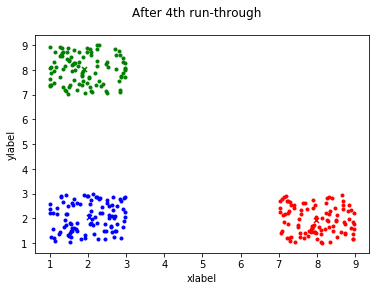

centroid(x=2.0209016472277055, y=2.0466964897453943, counter=0, score_x=0, score_y=0)
centroid(x=1.9054462320878331, y=8.031561069475417, counter=0, score_x=0, score_y=0)
centroid(x=7.981791359753243, y=1.9256940917768086, counter=0, score_x=0, score_y=0)


In [142]:
#vierter durchlauf von k mean
measure_distance()
closest_centroid()
reassign_centroid()


fig = plt.figure()
fig.suptitle('After 4th run-through')
plot_array()
plt.show()
print(a)
print(b)
print(c)